# Movie Analysis for Microsoft

#### Authors:  Derek Supino, Hyunwook Paul Shin, and Stephen William

![Theater](https://images.squarespace-cdn.com/content/v1/5817f843579fb366cecb8e9a/1610030522633-QNYMAAV89SWZ97BJW46C/theater.jpg?format=1000w)

# Overview

This is a project to provide Microsoft with a guide on what goes into creating and releasing a sucessfull movie based on data pulled from several reputable sources. Microsoft has launched its own movie studio but they don't know what tpye of film to release or even who to hire to help create a profitable film. The data was cleaned, organized and analysised to find out what the most sucessfull films of all time had in common with each other. With this information we can present the head of Microsoft's new movie studio what they can do to guarentee a sucessfull movie release.

# Business Problem

Micosoft's new film studio has just launched and they are trying to release a sucessfull movie but don't know where to start. With the data we collected and analysed we where able to come up with some questions that we thought where important to a sucessfull movie like "What months generate the most worldwide gross?", "What genres brings in the most profit?", and "What directors have brought in the biggest profits?". We believe these are the most important questions for a new film studio to ask because overall these are variables that can be closely connected to generating a profit.

We have 3 deliverables for the directors of the Microsoft Studio:

* Suggest which types of films are worth focusing on by establishing which genre makes the most profit.
* Analyze the monthly average return on investment rate for the suggested genre to determine which month has the best chance of earning profit.
* Evaluate how much do the top 50 directors contribute to the total profit to study the impact of the director on the movie production.

# Data

We will use the data from the following sources:

* **[IMDB](https://www.imdb.com/)**
* **[The Numbers](https://www.the-numbers.com)**

IMDB: There are multiple dataset only including partial informations. The information we will need for the most is the genres and the staffs (directors, writers, actors, production) involved in movie production.

The relevant dataset we will be using are the followings:
* `imdb.name.basics.csv.gz`
* `imdb.title.akas.csv.gz`
* `imdb.title.basics.csv.gz`
* `imdb.title.principals.csv.gz`

The Number: This dataset includes the production budget and gross profit (both domestic and worldwide). The release date of the film is also included. The economic metrics will be used further to calculate the net profit and return on investment ratio (ROI).

The relevant dataset we will be using are the followings:
* `tn.movie_budgets.csv.gz`

## Import Data

In [1]:
# Import pandas to read dataset
import pandas as pd

We will create dataframes for imdb and the numbers

In [2]:
n_b = pd.read_csv('Data/imdb.name.basics.csv')

In [3]:
t_a = pd.read_csv('Data/imdb.title.akas.csv')

In [4]:
t_b = pd.read_csv('Data/imdb.title.basics.csv')

In [5]:
t_p = pd.read_csv('Data/imdb.title.principals.csv')

In [6]:
m_b = pd.read_csv('Data/tn.movie_budgets.csv')


# Methods

The several Imdb data sets where connected using movie and crew ID's to connect movie titles with their correct release date, budget, gross, crew members and genre's. Some data was missing so we further connected the movie titles and crew names with other data sets from The Numbers.com. With this method we can consolidate the data into just a few usefull tables that make it easier to analyse and cut out data that we don't find usefull.

We will check the dataframe information to figure out which columns to connet

In [7]:
# Find columns to merge on
print('< n_b >')
print(n_b.info())
print()
print('< t_a >')
print(t_a.info())
print()
print('< t_b >')
print(t_b.info())
print()
print('< t_p >')
print(t_p.info())
print()
print('< m_b >')
print(m_b.info())
print()

< n_b >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   nconst              606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
 5   known_for_titles    576444 non-null  object 
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
None

< t_a >
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   title_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   langua

Seems like the common column for imbd data are nconst and tconst. However there is no tconst in title.akas. So, we will check first five row of dataframe t_a and t_b to figure out if they have column with same value.

In [8]:
t_a.head()

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [9]:
t_b.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


Seems like column title_id in t_a has same values with column tconst in other imdb files

For The Numbers data, we  will connect this data with IMDB files using the movie title and start_year (year of release).

## Cleaning

### name.basics

In [10]:
# n_b
# drop irrelevant columns
n_b = n_b.drop('birth_year', 1)
# drop any people who are dead
n_b = n_b[n_b['death_year'].isna()]
# drop death year because no longer relevant
n_b = n_b.drop('death_year', 1)
# drop na values in title id
n_b = n_b[n_b['known_for_titles'].notna()]
# drop na values in primary profession
n_b = n_b[n_b['primary_profession'].notna()]
# Check info
n_b.info()

/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/3333370347.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  n_b = n_b.drop('birth_year', 1)
/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/3333370347.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  n_b = n_b.drop('death_year', 1)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 529154 entries, 0 to 606647
Data columns (total 4 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   nconst              529154 non-null  object
 1   primary_name        529154 non-null  object
 2   primary_profession  529154 non-null  object
 3   known_for_titles    529154 non-null  object
dtypes: object(4)
memory usage: 20.2+ MB


### title.akas

In [11]:
# drop irrelevant columns
t_a = t_a.drop(columns = ['language', 'types', 'attributes'])
# only want original titles to get rid of repeats
is_original_title = t_a['is_original_title'] == 1
is_original_title = t_a[is_original_title]
t_a = is_original_title
# drop irrelevant columns 
t_a = t_a.drop('region', 1)
t_a = t_a.drop('ordering', 1)
# convert column title_id to tconst for merge
t_a['tconst'] = t_a['title_id']
t_a = t_a.drop('title_id', 1)

t_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44700 entries, 38 to 331700
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              44700 non-null  object 
 1   is_original_title  44700 non-null  float64
 2   tconst             44700 non-null  object 
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/483294010.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t_a = t_a.drop('region', 1)
/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/483294010.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t_a = t_a.drop('ordering', 1)
/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/483294010.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t_a = t_a.drop('title_id', 1)


### title.basics

In [12]:
# drop irrelevant column
t_b = t_b.drop('runtime_minutes', 1)
# drop na values in genres 
t_b = t_b[t_b['genres'].notna()]
# drop og title becaus it is not needed
t_b = t_b.drop('original_title', 1)

t_b.head()

/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/338225854.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t_b = t_b.drop('runtime_minutes', 1)
/var/folders/m3/ywsrz7k170vbk8511l1h_6840000gn/T/ipykernel_23731/338225854.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  t_b = t_b.drop('original_title', 1)


,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,Drama
3,tt0069204,Sabse Bada Sukh,2018,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,"Comedy,Drama,Fantasy"


In [13]:
# Explode the genres
# Convert values into string and split them
t_b['genres'] = t_b['genres'].str.split(",")
# Convert values into list of strings
t_b['genres'] = t_b['genres'].tolist()
# Explode list into individual values
t_b = t_b.explode('genres')
t_b

,tconst,primary_title,start_year,genres
0,tt0063540,Sunghursh,2013,Action
0,tt0063540,Sunghursh,2013,Crime
0,tt0063540,Sunghursh,2013,Drama
1,tt0066787,One Day Before the Rainy Season,2019,Biography
1,tt0066787,One Day Before the Rainy Season,2019,Drama
...,...,...,...,...
146138,tt9916428,The Secret of China,2019,War
146139,tt9916538,Kuambil Lagi Hatiku,2019,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
146141,tt9916706,Dankyavar Danka,2013,Comedy


In [14]:
# Check info
t_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 229550 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   tconst         229550 non-null  object
 1   primary_title  229550 non-null  object
 2   start_year     229550 non-null  int64 
 3   genres         229550 non-null  object
dtypes: int64(1), object(3)
memory usage: 8.8+ MB


### title.principals

In [15]:
# drop irrelevant columns
t_p = t_p.drop(columns = ['characters', 'ordering', 'job'])
# Renamed column category to job
t_p.rename({'category':'job'}, axis = 1, inplace = True)
t_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   tconst  1028186 non-null  object
 1   nconst  1028186 non-null  object
 2   job     1028186 non-null  object
dtypes: object(3)
memory usage: 23.5+ MB


In [16]:
m_b.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### tn.movie_budgets

In [17]:
# Extract month and year from the column release date
# Create column month and year
# Name year column as start_year for merge
pd.to_datetime(m_b['release_date'])
m_b['month'] = pd.DatetimeIndex(m_b['release_date']).month
m_b['start_year'] = pd.DatetimeIndex(m_b['release_date']).year
# drop irrelevant columns
m_b = m_b.drop(columns=['release_date', 'id', 'domestic_gross'], axis = 1)
# rename column movie to title for merge
m_b.rename({'movie' : 'title'}, axis = 1, inplace=True)
m_b.head()

,title,production_budget,worldwide_gross,month,start_year
0,Avatar,"$425,000,000","$2,776,345,279",12,2009
1,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$1,045,663,875",5,2011
2,Dark Phoenix,"$350,000,000","$149,762,350",6,2019
3,Avengers: Age of Ultron,"$330,600,000","$1,403,013,963",5,2015
4,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$1,316,721,747",12,2017


We need to calculate the net profit and return on investment(ROI) for our analysis.
* **Profit** can be calculated by subtracting production_budget from worldwide_gross
* **ROI** can be calculated by dividing profit with production_budget

In [18]:
# Current type of the budget and gross is object
# Remove $ and , and change type to float
m_b[m_b.columns[1:]] = m_b[m_b.columns[1:]].replace('[\$,]', '', regex=True).astype(float)
# Create column profit
m_b['profit'] = m_b['worldwide_gross'] - m_b['production_budget']
# Create return on investment ratio (ROI)
m_b['ROI'] = m_b['profit']*100/m_b['production_budget']
m_b.head()

,title,production_budget,worldwide_gross,month,start_year,profit,ROI
0,Avatar,425000000.0,2.776345e+09,12.0,2009.0,2.351345e+09,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000.0,1.045664e+09,5.0,2011.0,6.350639e+08,154.667286
2,Dark Phoenix,350000000.0,1.497624e+08,6.0,2019.0,-2.002376e+08,-57.210757
3,Avengers: Age of Ultron,330600000.0,1.403014e+09,5.0,2015.0,1.072414e+09,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000.0,1.316722e+09,12.0,2017.0,9.997217e+08,315.369636


In [19]:
m_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              5782 non-null   object 
 1   production_budget  5782 non-null   float64
 2   worldwide_gross    5782 non-null   float64
 3   month              5782 non-null   float64
 4   start_year         5782 non-null   float64
 5   profit             5782 non-null   float64
 6   ROI                5782 non-null   float64
dtypes: float64(6), object(1)
memory usage: 316.3+ KB


## Data Merge

We will use inner merge so that we can avoid having rows with null values left in dataframe.

In [20]:
# inner merge name.basics with title.principals on column nconst
df1 = n_b.merge(t_p, on = 'nconst', how = 'inner')
# check
df1.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,job
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer
1,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt0433397,composer
2,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt1681372,composer
3,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2387710,composer
4,nm0061865,Joseph Bauer,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940",tt2281215,composer


In [21]:
# inner merge previous dataframe with title.akas on column tconst
df2 = df1.merge(t_a, on='tconst', how = 'inner')

# check
df2.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,job,title,is_original_title
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0
1,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,director,Smurfs: The Lost Village,1.0
2,nm0449549,Jordan Kerner,"producer,actor,executive","tt0101921,tt0141369,tt0119190,tt0108333",tt2398241,producer,Smurfs: The Lost Village,1.0
3,nm0962596,Pamela Ribon,"writer,producer,actress","tt0898332,tt3521164,tt5848272,tt2458776",tt2398241,writer,Smurfs: The Lost Village,1.0
4,nm0542133,Joe Manganiello,"actor,stunts,producer","tt0974015,tt2268016,tt0844441,tt0837156",tt2398241,actor,Smurfs: The Lost Village,1.0


In [22]:
# inner merge previous dataframe with title.basics on column tconst
df3 = df2.merge(t_b, on='tconst', how ='inner')
# check 
df3.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,job,title,is_original_title,primary_title,start_year,genres
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Adventure
1,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Animation
2,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Comedy
3,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,director,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Adventure
4,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,director,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Animation


In [23]:
# inner merge previous dataframe with tn.movie_budgets on multiple columns (title , start_year) 
final_df = df3.merge(m_b, on=['title', 'start_year'], how = 'inner')
# check
final_df.head()

,nconst,primary_name,primary_profession,known_for_titles,tconst,job,title,is_original_title,primary_title,start_year,genres,production_budget,worldwide_gross,month,profit,ROI
0,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Adventure,60000000.0,197578586.0,4.0,137578586.0,229.297643
1,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Animation,60000000.0,197578586.0,4.0,137578586.0,229.297643
2,nm0061671,Mary Ellen Bauder,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553",tt2398241,producer,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Comedy,60000000.0,197578586.0,4.0,137578586.0,229.297643
3,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,director,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Adventure,60000000.0,197578586.0,4.0,137578586.0,229.297643
4,nm0038432,Kelly Asbury,"art_department,animation_department,director","tt0298148,tt0101414,tt0166813,tt0377981",tt2398241,director,Smurfs: The Lost Village,1.0,Smurfs: The Lost Village,2017,Animation,60000000.0,197578586.0,4.0,137578586.0,229.297643


Although we used inner merge, check information to make sure there is no row with null values

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35908 entries, 0 to 35907
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   nconst              35908 non-null  object 
 1   primary_name        35908 non-null  object 
 2   primary_profession  35908 non-null  object 
 3   known_for_titles    35908 non-null  object 
 4   tconst              35908 non-null  object 
 5   job                 35908 non-null  object 
 6   title               35908 non-null  object 
 7   is_original_title   35908 non-null  float64
 8   primary_title       35908 non-null  object 
 9   start_year          35908 non-null  int64  
 10  genres              35908 non-null  object 
 11  production_budget   35908 non-null  float64
 12  worldwide_gross     35908 non-null  float64
 13  month               35908 non-null  float64
 14  profit              35908 non-null  float64
 15  ROI                 35908 non-null  float64
dtypes: f

## Clean Final Dataframe

In [25]:
# drop irrelevant columns
final_df = final_df.drop(columns = ['is_original_title', 'tconst', 'primary_title', 'nconst','primary_profession','known_for_titles'])
final_df.head()

,primary_name,job,title,start_year,genres,production_budget,worldwide_gross,month,profit,ROI
0,Mary Ellen Bauder,producer,Smurfs: The Lost Village,2017,Adventure,60000000.0,197578586.0,4.0,137578586.0,229.297643
1,Mary Ellen Bauder,producer,Smurfs: The Lost Village,2017,Animation,60000000.0,197578586.0,4.0,137578586.0,229.297643
2,Mary Ellen Bauder,producer,Smurfs: The Lost Village,2017,Comedy,60000000.0,197578586.0,4.0,137578586.0,229.297643
3,Kelly Asbury,director,Smurfs: The Lost Village,2017,Adventure,60000000.0,197578586.0,4.0,137578586.0,229.297643
4,Kelly Asbury,director,Smurfs: The Lost Village,2017,Animation,60000000.0,197578586.0,4.0,137578586.0,229.297643


In [26]:
# Reorganize the columns
# Make a list of column names
cols = final_df.columns.tolist()
cols

['primary_name',
 'job',
 'title',
 'start_year',
 'genres',
 'production_budget',
 'worldwide_gross',
 'month',
 'profit',
 'ROI']

In [27]:
# Reorganize the columns and apply
cols = ['title','genres','start_year', 'month','primary_name','job','production_budget','worldwide_gross','profit','ROI']
final_df = final_df[cols]
final_df.head()

,title,genres,start_year,month,primary_name,job,production_budget,worldwide_gross,profit,ROI
0,Smurfs: The Lost Village,Adventure,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
1,Smurfs: The Lost Village,Animation,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
2,Smurfs: The Lost Village,Comedy,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
3,Smurfs: The Lost Village,Adventure,2017,4.0,Kelly Asbury,director,60000000.0,197578586.0,137578586.0,229.297643
4,Smurfs: The Lost Village,Animation,2017,4.0,Kelly Asbury,director,60000000.0,197578586.0,137578586.0,229.297643


In [28]:
# Changing job values
# Check the values inf column job
final_df['job'].value_counts()

actor                  9208
producer               7246
writer                 6571
actress                5376
director               3914
composer               1806
cinematographer        1040
editor                  492
production_designer     171
self                     81
archive_footage           3
Name: job, dtype: int64

In [29]:
# Actress& Self is basically same job with actor  
# Therefore, witch those values to actor in case we use the column for further study
final_df.iloc[final_df['job'] == 'self', final_df.columns.get_loc('job')] = 'actor'
final_df.iloc[final_df['job'] == 'actress', final_df.columns.get_loc('job')] = 'actor'
final_df['job'].value_counts()

actor                  14665
producer                7246
writer                  6571
director                3914
composer                1806
cinematographer         1040
editor                   492
production_designer      171
archive_footage            3
Name: job, dtype: int64

In [30]:
# Convert Column Names
# Cleaning the name
final_df.rename(columns = {'genres':'Genres', 
           'job': 'Staff_role', 
           'start_year': 'Released_year', 
           'title': 'Title', 
           'primary_name': 'Staff_name', 
           'production_budget': 'Investment', 
           'worldwide_gross': 'Revenue',
           'month':'Released_month',
           'profit':'Profit'}, inplace = True)
final_df

,Title,Genres,Released_year,Released_month,Staff_name,Staff_role,Investment,Revenue,Profit,ROI
0,Smurfs: The Lost Village,Adventure,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
1,Smurfs: The Lost Village,Animation,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
2,Smurfs: The Lost Village,Comedy,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
3,Smurfs: The Lost Village,Adventure,2017,4.0,Kelly Asbury,director,60000000.0,197578586.0,137578586.0,229.297643
4,Smurfs: The Lost Village,Animation,2017,4.0,Kelly Asbury,director,60000000.0,197578586.0,137578586.0,229.297643
...,...,...,...,...,...,...,...,...,...,...
35903,Her Cry: La Llorona Investigation,Horror,2013,10.0,Hai Nguyen,producer,35000.0,0.0,-35000.0,-100.000000
35904,Her Cry: La Llorona Investigation,Horror,2013,10.0,James Ezrin,actor,35000.0,0.0,-35000.0,-100.000000
35905,Her Cry: La Llorona Investigation,Horror,2013,10.0,Everardo Guzman,actor,35000.0,0.0,-35000.0,-100.000000
35906,Her Cry: La Llorona Investigation,Horror,2013,10.0,Art Blackmore,composer,35000.0,0.0,-35000.0,-100.000000


In [31]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35908 entries, 0 to 35907
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           35908 non-null  object 
 1   Genres          35908 non-null  object 
 2   Released_year   35908 non-null  int64  
 3   Released_month  35908 non-null  float64
 4   Staff_name      35908 non-null  object 
 5   Staff_role      35908 non-null  object 
 6   Investment      35908 non-null  float64
 7   Revenue         35908 non-null  float64
 8   Profit          35908 non-null  float64
 9   ROI             35908 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 3.0+ MB


# Data Visualization

We will import matplot library to visualize the data we joined and connected

In [32]:
# Import python tools for visualization
import matplotlib.pyplot as plt
%matplotlib inline

## Genre Analysis

We will analyze the relationship between the genres and the average net profit. Based on this analysis, we will suggest the top 3 genres with highest average net profit.

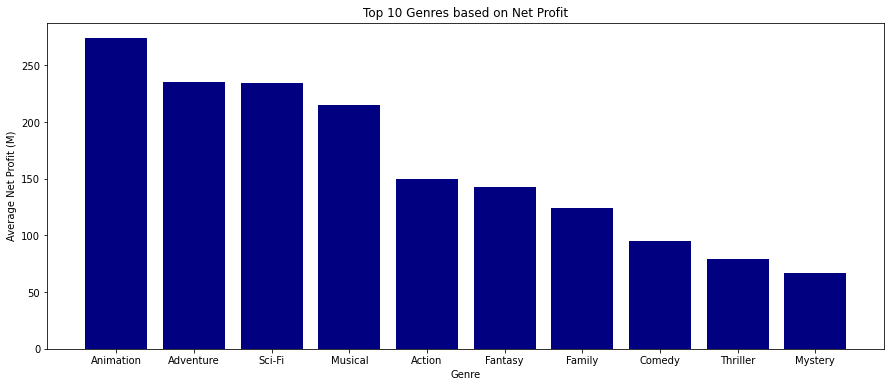

In [33]:
# Genre Profit Analysis
# Create a figure and axis
fig, ax = plt.subplots(figsize=(15,6))
# Calculate the average net profit(unit in million dollar) of each genre and find top 10 genre
profit_data = final_df.groupby(['Genres']).Profit.mean()/10**6
profit_data = profit_data.sort_values(ascending= False).head(10)
# Get x and y data
x = profit_data.index
y = profit_data.values 
# Create bar chart
ax.bar(x, y, color = 'Navy') 
# Set title and labels
ax.set_title('Top 10 Genres based on Net Profit')
ax.set_xlabel('Genre')
ax.set_ylabel('Average Net Profit (M)')
# We do not need gridline for plot
ax.grid(False)
# Save figure
plt.savefig('Visuals/Top_Genre_Profit.png', dpi = 1200)

We can see that the top 3 genres are **Animation, Adventure and Sci-Fi**

However, Musical also has significantly high net profit so lets check the total numbers of movies in each genre so that if they are worth on suggesting.

In [34]:
# Animation Movie Counts
g_df=final_df[final_df['Genres']=='Animation']
# Remove duplicated movie titles
g_df = g_df.drop_duplicates('Title')
g_df

,Title,Genres,Released_year,Released_month,Staff_name,Staff_role,Investment,Revenue,Profit,ROI
1,Smurfs: The Lost Village,Animation,2017,4.0,Mary Ellen Bauder,producer,60000000.0,197578586.0,137578586.0,229.297643
305,Ferdinand,Animation,2017,12.0,Ron Burch,writer,111000000.0,289847930.0,178847930.0,161.124261
822,Home,Animation,2015,3.0,Matt Ember,writer,130000000.0,385997896.0,255997896.0,196.921458
854,Epic,Animation,2013,5.0,Matt Ember,writer,100000000.0,262794441.0,162794441.0,162.794441
1395,Foodfight!,Animation,2012,12.0,Lawrence Kasanoff,director,45000000.0,73706.0,-44926294.0,-99.836209
...,...,...,...,...,...,...,...,...,...,...
33668,Call of the Wild,Animation,2020,2.0,Chris Sanders,director,82000000.0,0.0,-82000000.0,-100.000000
34371,The Star,Animation,2017,11.0,Pam Ziegenhagen,editor,20000000.0,62758010.0,42758010.0,213.790050
34500,L'illusionniste,Animation,2010,12.0,Jean-Claude Donda,actor,17000000.0,8609949.0,-8390051.0,-49.353241
35221,Zambezia,Animation,2012,12.0,Jeremy Suarez,actor,20000000.0,34454336.0,14454336.0,72.271680


In [35]:
# Adventure Movie Counts
g_df=final_df[final_df['Genres']=='Adventure']
# Remove duplicated movie titles
g_df = g_df.drop_duplicates('Title')
g_df

,Title,Genres,Released_year,Released_month,Staff_name,Staff_role,Investment,Revenue,Profit,ROI
0,Smurfs: The Lost Village,Adventure,2017,4.0,Mary Ellen Bauder,producer,60000000.0,1.975786e+08,1.375786e+08,229.297643
304,Ferdinand,Adventure,2017,12.0,Ron Burch,writer,111000000.0,2.898479e+08,1.788479e+08,161.124261
383,Spectre,Adventure,2015,11.0,Jez Butterworth,writer,300000000.0,8.796209e+08,5.796209e+08,193.206974
497,Tian jiang xiong shi,Adventure,2015,9.0,Thomas Chong,production_designer,65000000.0,1.225199e+08,5.751987e+07,88.492114
624,Exodus: Gods and Kings,Adventure,2014,12.0,Adam Cooper,writer,140000000.0,2.683145e+08,1.283145e+08,91.653224
...,...,...,...,...,...,...,...,...,...,...
35220,Zambezia,Adventure,2012,12.0,Jeremy Suarez,actor,20000000.0,3.445434e+07,1.445434e+07,72.271680
35248,Earth to Echo,Adventure,2014,7.0,Andrew Panay,writer,13000000.0,4.217454e+07,2.917454e+07,224.419577
35356,Wreck-It Ralph,Adventure,2012,11.0,John C. Reilly,actor,165000000.0,4.965115e+08,3.315115e+08,200.916073
35387,Black Panther,Adventure,2018,2.0,Michael B. Jordan,actor,200000000.0,1.348258e+09,1.148258e+09,574.129112


In [36]:
# Sci-Fi Movie Counts
g_df=final_df[final_df['Genres']=='Sci-Fi']
# Remove duplicated movie titles
g_df = g_df.drop_duplicates('Title')
g_df

,Title,Genres,Released_year,Released_month,Staff_name,Staff_role,Investment,Revenue,Profit,ROI
255,Red Dawn,Sci-Fi,2012,11.0,Dan Bradley,director,65000000.0,4.816415e+07,-1.683585e+07,-25.901308
365,Edge of Tomorrow,Sci-Fi,2014,6.0,Jez Butterworth,writer,178000000.0,3.705413e+08,1.925413e+08,108.169245
884,Skyline,Sci-Fi,2010,11.0,Donald Faison,actor,10000000.0,6.826497e+07,5.826497e+07,582.649730
2266,Star Trek Into Darkness,Sci-Fi,2013,5.0,Zachary Quinto,actor,190000000.0,4.673816e+08,2.773816e+08,145.990307
2313,Star Trek Beyond,Sci-Fi,2016,7.0,Zachary Quinto,actor,185000000.0,3.358022e+08,1.508022e+08,81.514721
...,...,...,...,...,...,...,...,...,...,...
34948,Dark Phoenix,Sci-Fi,2019,6.0,James McAvoy,actor,350000000.0,1.497624e+08,-2.002376e+08,-57.210757
34969,Captain America: The First Avenger,Sci-Fi,2011,7.0,Samuel L. Jackson,actor,140000000.0,3.705698e+08,2.305698e+08,164.692697
35250,Earth to Echo,Sci-Fi,2014,7.0,Andrew Panay,writer,13000000.0,4.217454e+07,2.917454e+07,224.419577
35388,Black Panther,Sci-Fi,2018,2.0,Michael B. Jordan,actor,200000000.0,1.348258e+09,1.148258e+09,574.129112


In [37]:
# Musical Movie Counts
g_df=final_df[final_df['Genres']=='Musical']
# Remove duplicated movie titles
g_df = g_df.drop_duplicates('Title')
g_df

,Title,Genres,Released_year,Released_month,Staff_name,Staff_role,Investment,Revenue,Profit,ROI
7668,The Greatest Showman,Musical,2017,12.0,Bill Condon,writer,84000000.0,3.866656e+08,3.026656e+08,360.316131
7698,Beauty and the Beast,Musical,2017,3.0,Bill Condon,director,160000000.0,1.259200e+09,1.099200e+09,686.999816
9005,Burlesque,Musical,2010,11.0,Jon Gary Steele,production_designer,55000000.0,9.055268e+07,3.555268e+07,64.641227
15623,Standing Ovation,Musical,2010,7.0,Laurie McDowell,editor,5600000.0,5.318060e+05,-5.068194e+06,-90.503464
27536,Rock of Ages,Musical,2012,6.0,Adam Shankman,director,70000000.0,6.103193e+07,-8.968068e+06,-12.811526
34050,Yeh Jawaani Hai Deewani,Musical,2013,5.0,Karan Johar,producer,8300000.0,5.082747e+07,4.252747e+07,512.379108


Musical has only 6 unique movies while other 3 has at least 100 movies per genre. Therefore, we conclude musical as inconclusive.

# Month to Release Film

We will analyze the monthly average ROI to visualize which month has a best chance of earning profit.

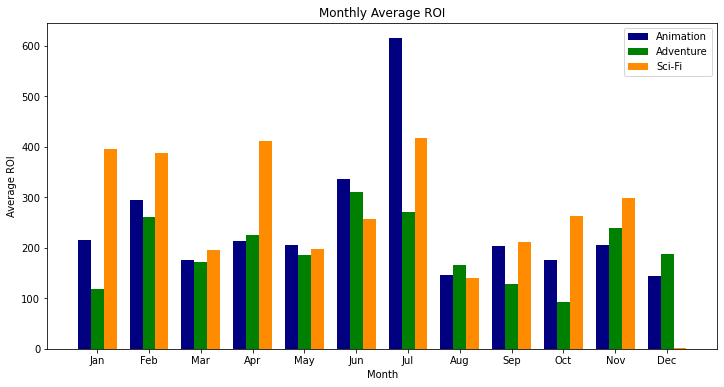

In [38]:
# 3 in 1 Bar chart
# Create datasets for top 3 genres
g1_df=final_df[final_df['Genres']=='Animation']
g1_df = g1_df.drop_duplicates('Title')
g1a_data = g1_df.groupby(['Released_month']).ROI.mean()
g2_df=final_df[final_df['Genres']=='Adventure']
g2_df = g2_df.drop_duplicates('Title')
g2a_data = g2_df.groupby(['Released_month']).ROI.mean()
g3_df=final_df[final_df['Genres']=='Sci-Fi']
g3_df = g3_df.drop_duplicates('Title')
g3a_data = g3_df.groupby(['Released_month']).ROI.mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12,6))

# Get x and y data
x1 = g1a_data.index
y1 = g1a_data.values
x2 = g2a_data.index
y2 = g2a_data.values
x3 = g3a_data.index
y3 = g3a_data.values

# Create Animation bar chart 0.25 left to the center and assign unique color
ax.bar(x1-0.25, y1, width= 0.25, color='navy')
# Create Adventure bar chart on the center and assign unique color
ax.bar(x2, y2, width = 0.25, color='green')
# Create Sci-Fi bar chart 0.25 right to the center and assign unique color
ax.bar(x3+0.25, y3, width = 0.25, color='darkorange')

# Set tick labels as name of the month corresponding the number
months =['Jan','Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug', 'Sep', 'Oct', 'Nov', 'Dec']
months_num = range(1,13)
ax.set_xticks(months_num)
ax.set_xticklabels(months)
# Set title, labels, and legend
ax.set_title('Monthly Average ROI')
ax.set_xlabel('Month')
ax.set_ylabel('Average ROI')
ax.legend(["Animation", "Adventure", "Sci-Fi"])
# Remove Gridlines
ax.grid(False)
# Save figure
plt.savefig('Visuals/Monthly_ROI.png', dpi = 1200)

The bar chart shows that there is a peak in early summer. We assume this is due to the reasons such as kids are out of school and many parents are taking vacation time for June and July. This is most significant for Animation movies because their primary target is young children and their parents.

The Average ROI for December seems like it is 0. It is odd and we need to check the validity of the data.

In [39]:
# Check Sci-Fi Average ROI for December
g_df=final_df[final_df['Genres']=='Sci-Fi']
# Drop the duplicated titles
g_df = g_df.drop_duplicates('Title')
# Group the dataframe on Month by its Average ROI
ga_data = g_df.groupby(['Released_month']).ROI.mean()
ga_data

Released_month
1.0     395.524350
2.0     387.044698
3.0     195.144553
4.0     411.645261
5.0     197.550126
6.0     256.446300
7.0     418.423122
8.0     141.139328
9.0     212.266923
10.0    262.633071
11.0    298.541279
12.0      1.674468
Name: ROI, dtype: float64

The average ROI for December was 1.674% which is not 0 but too small compared to other average ROI to be visualize.

Else than this value, ROI tends to show a little more constant on average ROI over the year compared to the Adventure and Animation.

## Directors

In [40]:
directors = final_df[final_df.Staff_role == 'director']

#created new df with only directors from final_df

In [41]:
unique_titles_df = directors.drop_duplicates(subset= ['Title'])

#using new director df, got rid of any duplicate titles

In [42]:
profit_directors = unique_titles_df.groupby('Staff_name')['Profit'].sum().sort_values(ascending=False)
top_50_directors = profit_directors.nlargest(50)
top_50_directors_profit = top_50_directors.values.sum()
total_profit = unique_titles_df['Profit'].sum()
top_50_directors_profit_perc = top_50_directors_profit/total_profit
rest_profit = 1 - top_50_directors_profit_perc

#found top 50 directors based on profit. summed up profit for entire df, divided it by the sum of top_50 directors.

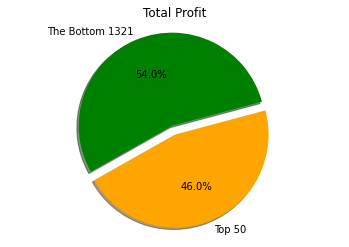

<Figure size 432x288 with 0 Axes>

In [43]:
fig, ax = plt.subplots()
my_data = [rest_profit, top_50_directors_profit_perc]
my_labels = 'The Bottom 1321', 'Top 50'
my_colors = ['green','orange']
my_explode = (0, 0.1)
plt.pie(my_data,labels = my_labels,autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('Total Profit')
plt.axis('equal')
plt.show()
plt.savefig('Visuals/Directors_Pie_chart.png')
#used a pie chart to show how much the top directors attributed for total profit. 

# Conclusion

* **Go for Top 3 Genres.** Based on our analysis, the top 3 film genres were **Adventure**, **Animation**, and **Sci-Fi**. These three films has highest net profit. While Musical has a similar net profit, we excluded from our genre suggestion because there are only 6 musical movies contained on the list, while top 3 contains at least 100 movies.
* **Aim Summerbreak.** The bar chart indicates that there is a **peak in early summer**. We assume this is due to the reasons such as kids are out of school and many parents are taking vacation time for **June and July**. This is most significant for Animation movies because their primary target is young children and their parents. For Sci-Fi movie, average ROI in December is empty. This is because average ROI is about 1.67% and it is too small compared to other month’s ROIs. Else than this value, ROI tends to show a little more constant on average ROI over the year compared to the Adventure and Animation.
* **Top 50 Directors.** Another result that we came up with is what directors are associated with generating the most profits. Through our analysis we discovered that the top 50 directors based on movie profits is responsible for 46% of total box office profits across all movies in our datasets released since 2010. 